<a href="https://colab.research.google.com/github/Rupeshkc222/premium-cost-health-insurance-deploy-in-web-using-flask-ML/blob/main/5thsemproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [ ]:
#load dataset
d_data=pd.read_csv('/content/insurance.csv')

# **data analyse and preprocessing**

In [ ]:
d_data.shape

(1339, 7)

In [ ]:
d_data.head()

,age,sex,bmi,children,smoker,region,charges
0,32,male,27.900,0,no,southwest,5500.26000
1,19,female,27.900,0,yes,southwest,1688.92400
2,19,male,33.770,1,no,southeast,1725.55230
3,28,male,33.000,3,no,southeast,4449.46200
4,33,male,22.705,0,no,northwest,21984.47061


In [ ]:
d_data.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
d_data['sex'].value_counts()

male      677
female    662
Name: sex, dtype: int64

In [ ]:
d_data['smoker'].value_counts()

no     1065
yes     274
Name: smoker, dtype: int64

In [ ]:
d_data['region'].value_counts()

southeast    364
southwest    326
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
d_data.describe()

,age,bmi,children,charges
count,1339.000000,1339.000000,1339.000000,1339.000000
mean,39.202390,30.661333,1.094100,13268.207058
std,14.044988,6.096375,1.205414,12111.820630
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4742.306100
50%,39.000000,30.400000,1.000000,9377.904700
75%,51.000000,34.687500,2.000000,16622.107580
max,64.000000,53.130000,5.000000,63770.428010


# ***CORRELATION***

In [ ]:
correlation=d_data.corr()

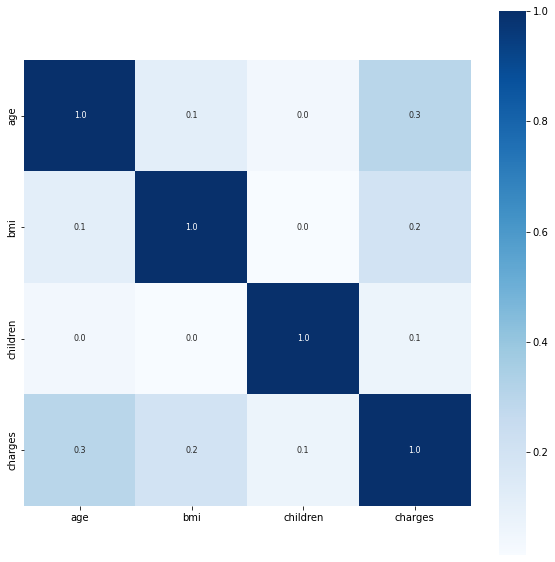

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot = True, annot_kws={'size':8},cmap='Blues')

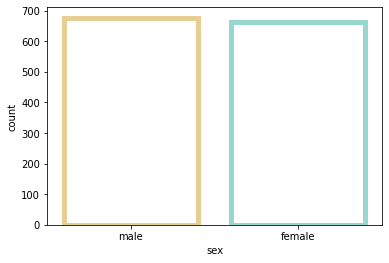

In [ ]:
#sex count
sns.countplot(x ='sex', data = d_data,color="salmon", facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("BrBG", 2))

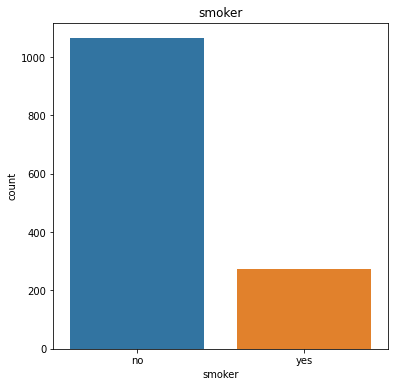

In [ ]:
#smoker count
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=d_data)
plt.title('smoker')
plt.show()

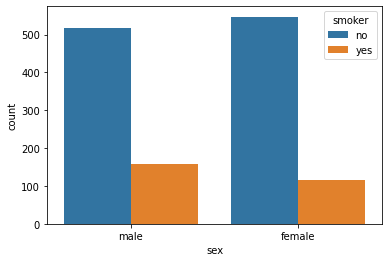

In [ ]:
sns.countplot(x ='sex', hue = "smoker", data = d_data)

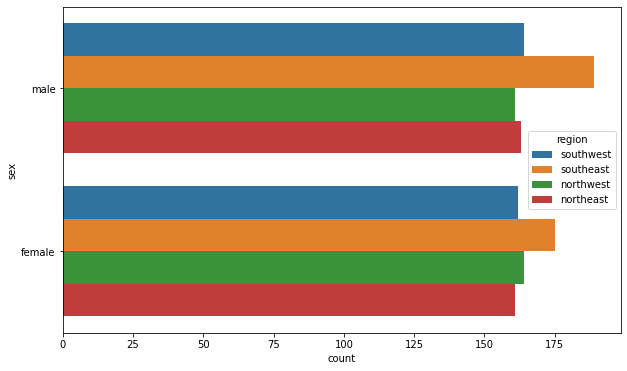

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(y ='sex', hue = "region", data = d_data)

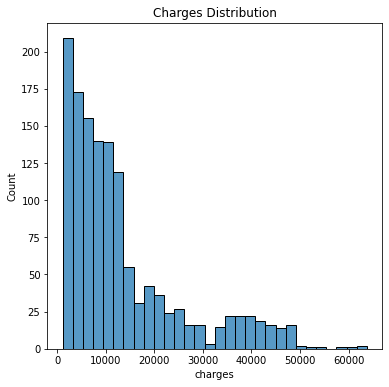

In [ ]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.histplot(d_data['charges'])
plt.title('Charges Distribution')
plt.show()

**finding outliers**

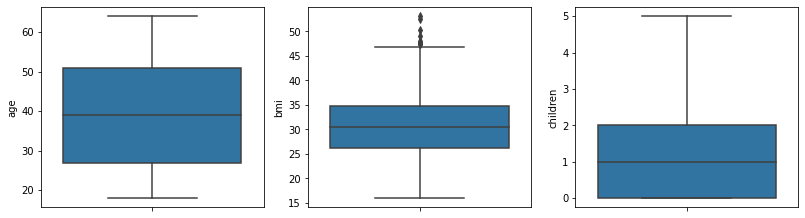

In [ ]:
#outliers
df=d_data[['age','bmi','children']]
fig=plt.figure(figsize=(15,15))
for i in range(len(df.columns)):
  fig.add_subplot(5,4,i+1)
  sns.boxplot(y=df.iloc[:,i] )
plt.tight_layout()
plt.show()

In [ ]:
def cap_data(df):
    for col in df.columns:
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col].loc[df[col] <= percentiles[0]] = percentiles[0]
            df[col].loc[df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df
d_data=cap_data(d_data)


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


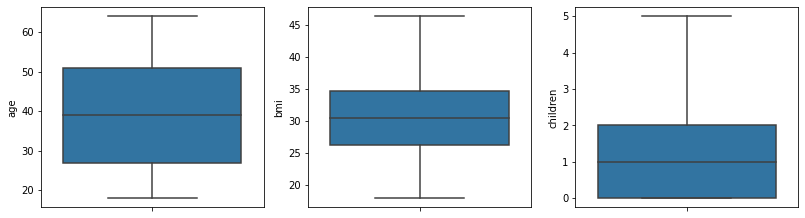

In [ ]:
df=d_data[['age','bmi','children']]
fig=plt.figure(figsize=(15,15))
for i in range(len(df.columns)):
  fig.add_subplot(5,4,i+1)
  sns.boxplot(y=df.iloc[:,i] )
plt.tight_layout()
plt.show()

**feature scaling** plot for checking skewness

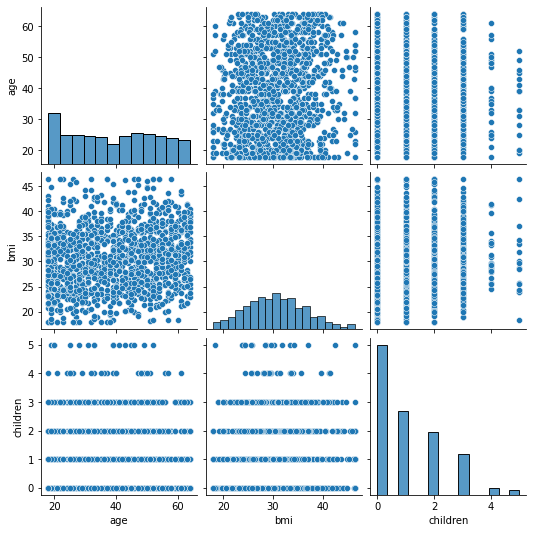

In [ ]:
sns.pairplot(d_data[['age','bmi','children']])

In [ ]:
col=d_data[['age','bmi','children']].skew()
col

age         0.056928
bmi         0.228663
children    0.939340
dtype: float64

In [ ]:
d_data['children']= d_data['children']**0.5
d_data['children'].skew()


0.1177243519831181

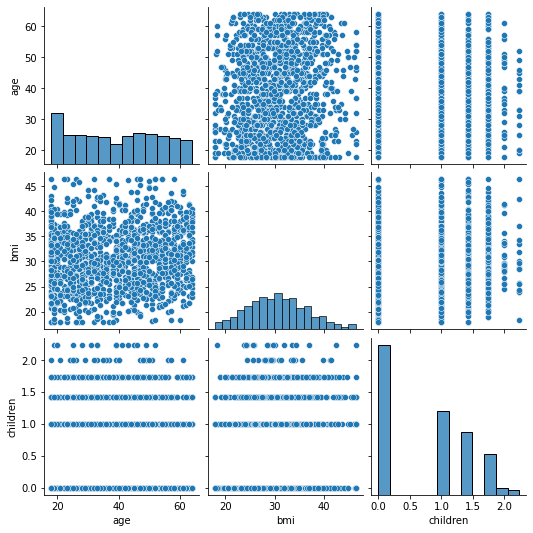

In [ ]:
#check
sns.pairplot(d_data[['age','bmi','children']])

# ***label encoding***

In [ ]:
#encoding for sex
label_encode=LabelEncoder()
labels=label_encode.fit_transform(d_data.sex)
d_data['sex']=labels

d_data['sex'].value_counts()

1    677
0    662
Name: sex, dtype: int64

In [ ]:
d_data.shape


(1339, 7)

In [ ]:
d_data.head()

,age,sex,bmi,children,smoker,region,charges
0,32,1,27.900,0.000000,no,southwest,5500.26000
1,19,0,27.900,0.000000,yes,southwest,1688.92400
2,19,1,33.770,1.000000,no,southeast,1725.55230
3,28,1,33.000,1.732051,no,southeast,4449.46200
4,33,1,22.705,0.000000,no,northwest,21984.47061


In [ ]:

d_data['sex'].value_counts()

#male-->1
#female-->0

1    677
0    662
Name: sex, dtype: int64

In [ ]:
#encoding for region


In [ ]:
d_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

d_data['region'].value_counts()

# 0-->southeast
# 1-->southwest
# 2-->northeast 
# 3-->northwest

0    364
1    326
3    325
2    324
Name: region, dtype: int64

In [ ]:
#encoding for smoker
d_data.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

d_data['smoker'].value_counts()


1    1065
0     274
Name: smoker, dtype: int64

In [ ]:


#no smoking -->1
#yes smoking --> 0

# ***spliting into Training and testing data***

In [ ]:

X = d_data.drop(columns='charges', axis=1)
Y = d_data['charges']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=3)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1339, 6) (1004, 6) (335, 6)


# **Model training-**

**linear regression**

In [ ]:
#model = LinearRegression()

In [ ]:
#model.fit(X_train.values, Y_train.values)

In [ ]:
# prediction on training data
#training_data_prediction =model.predict(X_train.values)

In [ ]:
# R squared value
'''r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)'''

"r2_train = metrics.r2_score(Y_train, training_data_prediction)\nprint('R squared vale : ', r2_train)"

In [ ]:
# prediction on test data
#testing_data_prediction =model.predict(X_test.values)

In [ ]:
# R squared value
'''r2_test = metrics.r2_score(Y_test, testing_data_prediction)
print('R squared vale : ', r2_test)'''

"r2_test = metrics.r2_score(Y_test, testing_data_prediction)\nprint('R squared vale : ', r2_test)"

 **DECISION TREE REGRESSOR**

In [ ]:
from sklearn.tree import DecisionTreeRegressor


treeRegressionModel = DecisionTreeRegressor(random_state=42, max_depth=5)
treeRegressionModel.fit(X_train.values, Y_train.values)
y_pred_dt = treeRegressionModel.predict(X_test.values)
treeRegressionModel.score(X_test.values, Y_test.values)

0.8428977233743359

In [ ]:
d_data.head()

,age,sex,bmi,children,smoker,region,charges
0,32,1,27.900,0.000000,1,1,5500.26000
1,19,0,27.900,0.000000,0,1,1688.92400
2,19,1,33.770,1.000000,1,0,1725.55230
3,28,1,33.000,1.732051,1,0,4449.46200
4,33,1,22.705,0.000000,1,3,21984.47061


# ***BUILDING A PREDICTIVE SYSTEM***

In [ ]:
input_data = (19,0,27.9,0,1,1)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = treeRegressionModel.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is INR ', prediction[0])

[2618.74334689]
The insurance cost is INR  2618.743346886793
